## Find and Delete Duplicate or Almost Duplicate Images Files

In [3]:
from utils.files import delete_duplicates, find_duplicates
from utils.plotting import plot_duplicates

search_test = find_duplicates("raw_dataset/test/")
plot_duplicates(search_test.result)

search_train = find_duplicates("raw_dataset/train/")
plot_duplicates(search_train.result)

### Deleting Duplicates

In [ ]:
delete_duplicates(search_test.result)
delete_duplicates(search_train.result)

## Hairline Removal

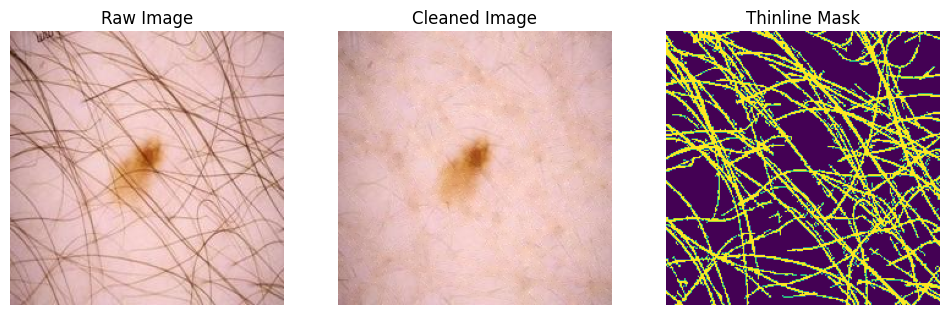

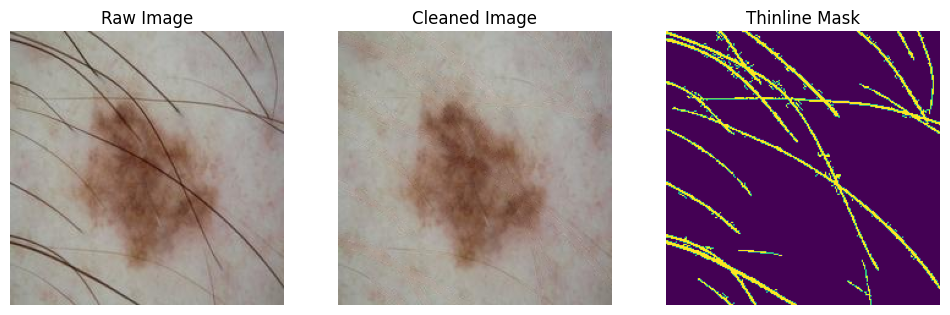

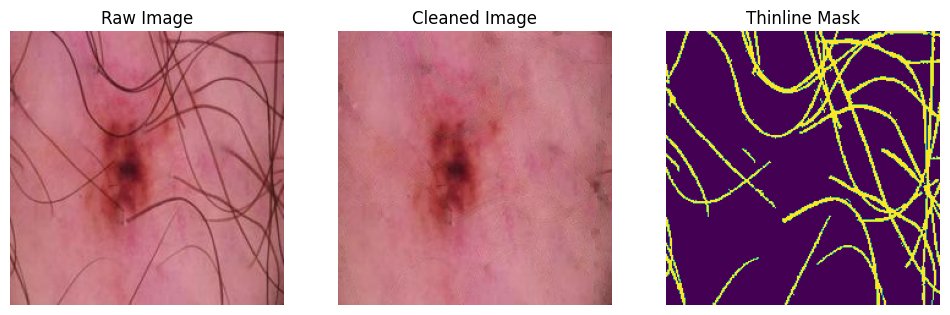

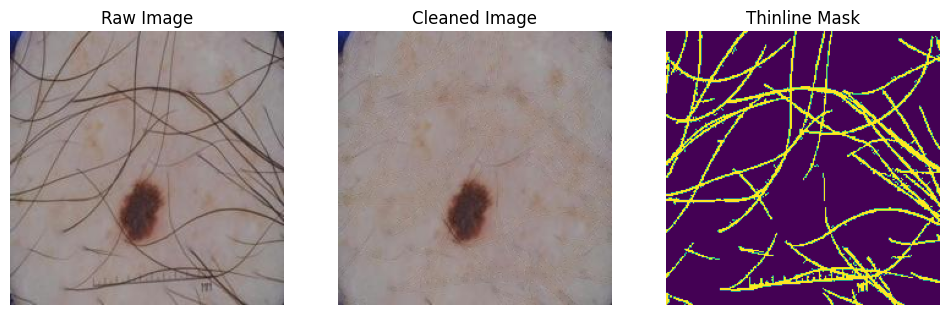

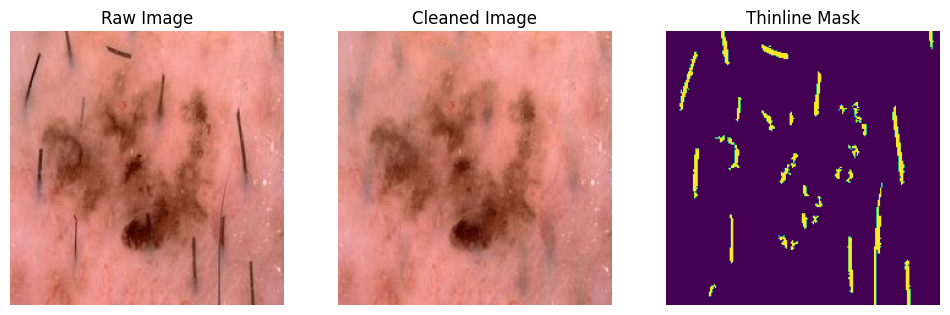

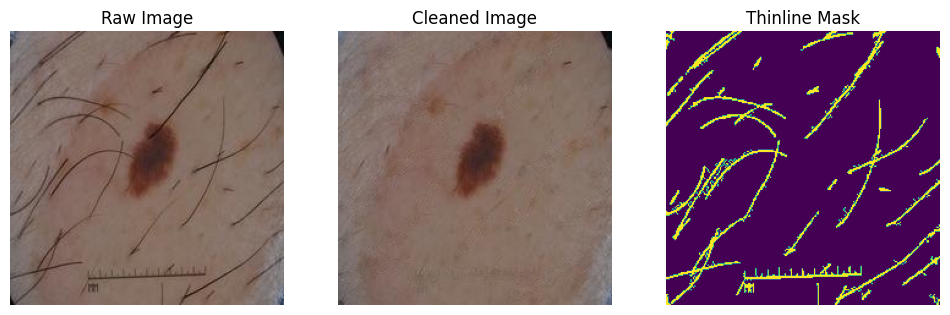

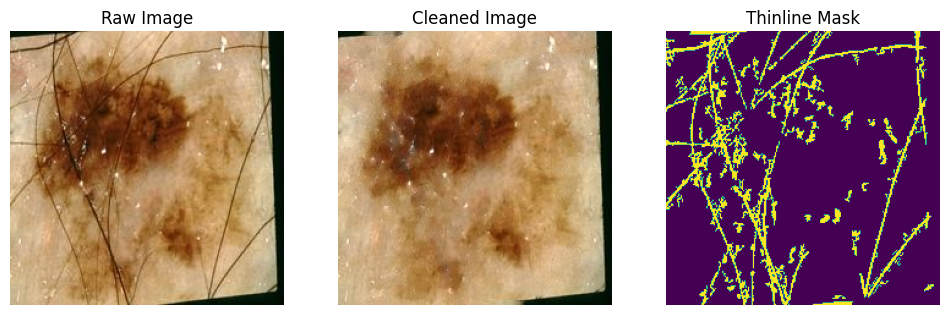

In [1]:
import cv2
from utils.preprocess import remove_thin_lines
from utils.plotting import plot_images

image_dir = "raw_dataset/"
image_paths = [
    "test/Benign/6322.jpg",
    "train/Malignant/599.jpg",
    "test/Benign/6673.jpg",
    "test/Benign/6706.jpg",
    "train/Malignant/665.jpg",
    "train/Malignant/892.jpg",
    "train/Malignant/866.jpg"
]

for image_path in image_paths:
    full_path = image_dir + image_path
    image = cv2.imread(full_path)
    
    if image is None:
        print(f"Failed to load image at {full_path}")
        continue

    image_clean, mask = remove_thin_lines(image)
    
    plot_images([image, image_clean, mask], 
                [f"Raw Image", "Cleaned Image", "Thinline Mask"])

## Full Image Cleanning - Hairline Removal and Boarder Cleaning

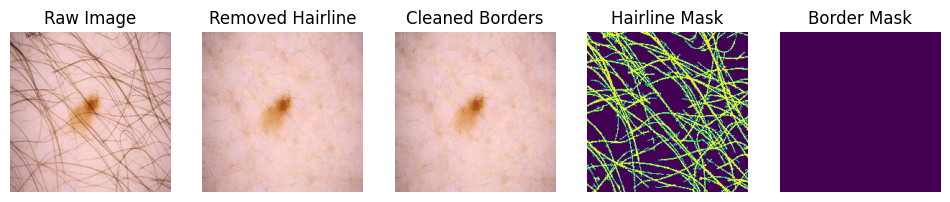

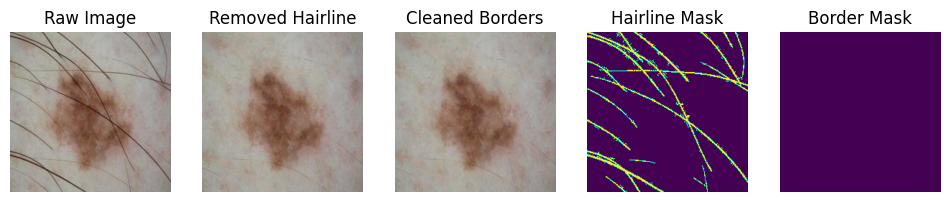

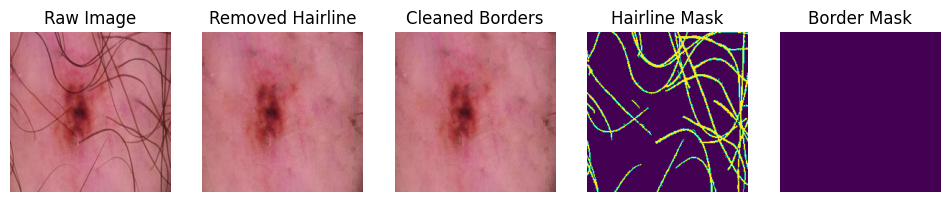

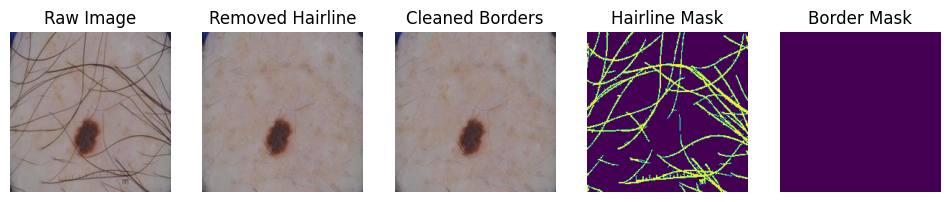

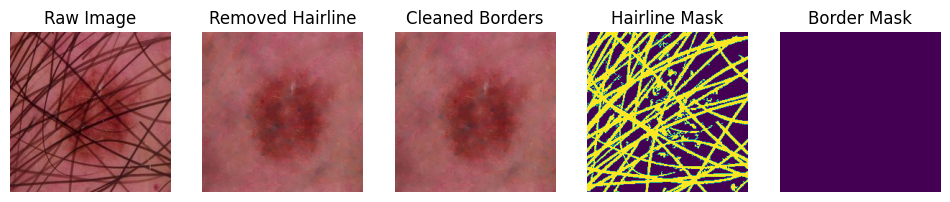

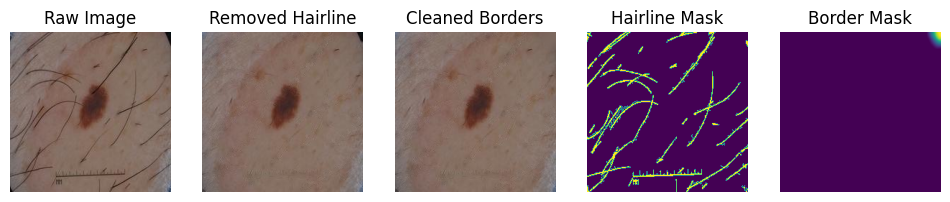

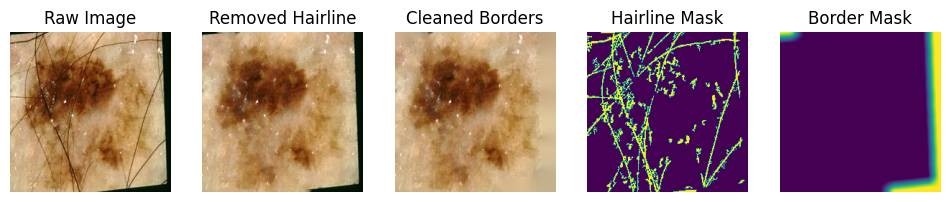

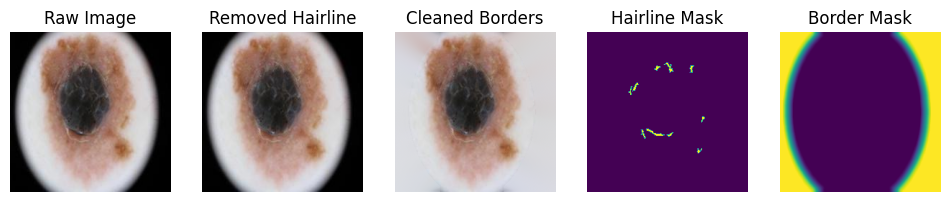

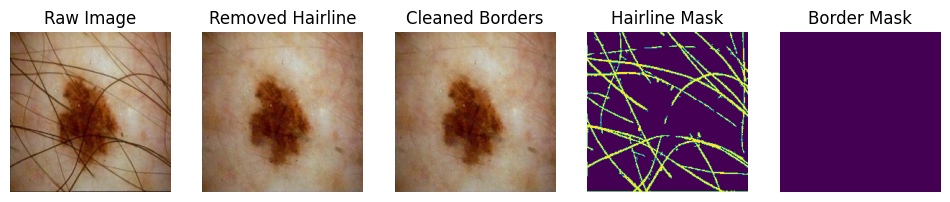

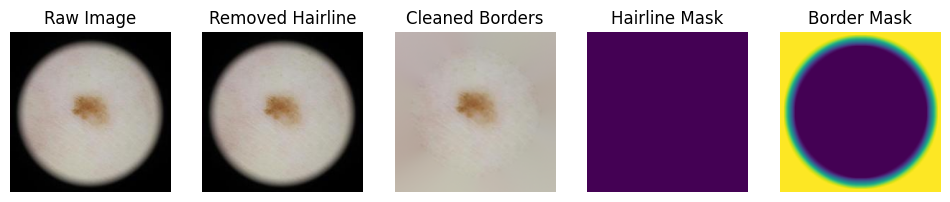

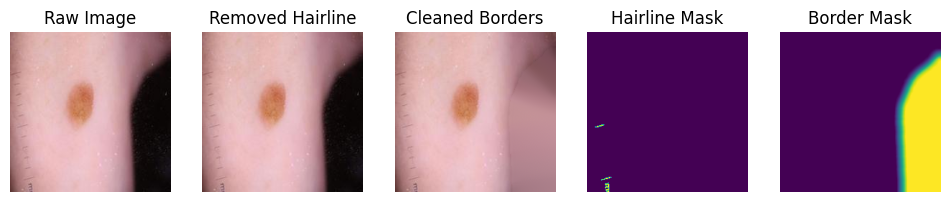

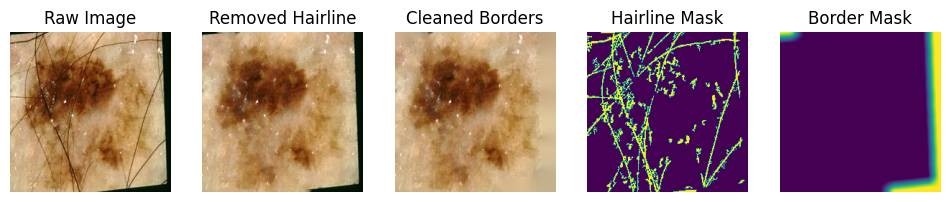

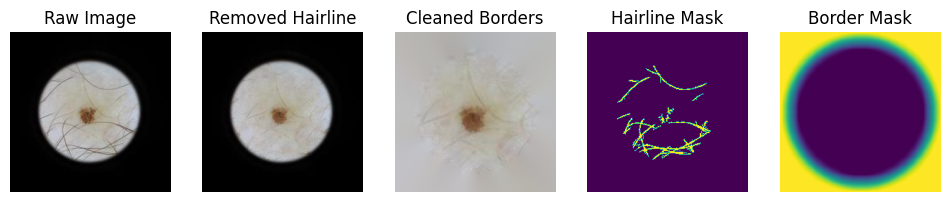

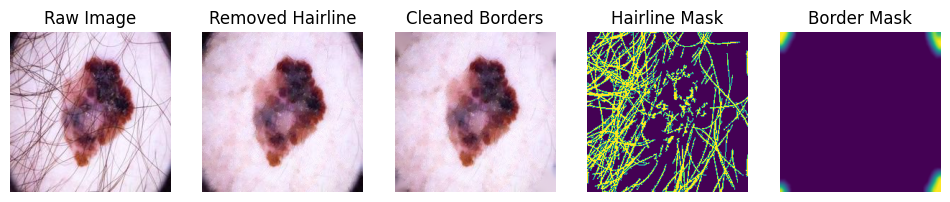

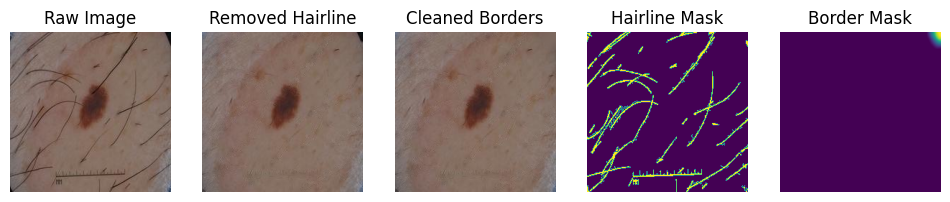

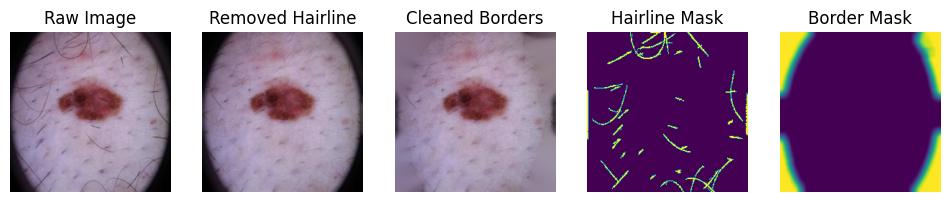

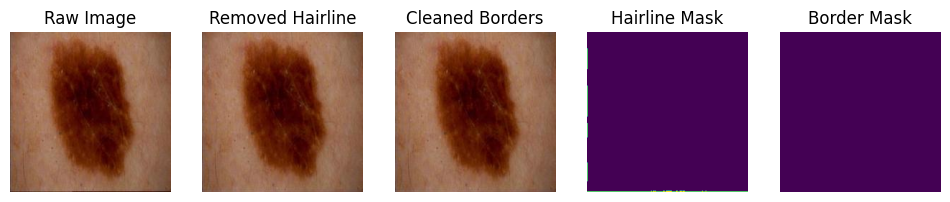

In [2]:
import cv2
from utils.preprocess import clean_image_borders, remove_thin_lines, create_blob_mask
from utils.plotting import plot_images

# List of image paths
image_paths = [
    "raw_dataset/test/Benign/6322.jpg",
    "raw_dataset/train/Malignant/599.jpg",
    "raw_dataset/test/Benign/6673.jpg",
    "raw_dataset/test/Benign/6706.jpg",
    "raw_dataset/train/Benign/93.jpg",
    "raw_dataset/train/Malignant/892.jpg",
    "raw_dataset/train/Malignant/866.jpg",
    "raw_dataset/train/Malignant/2222.jpg",
    "raw_dataset/test/Benign/6466.jpg",
    "raw_dataset/train/Malignant/3253.jpg",
    "raw_dataset/test/Benign/6331.jpg",
    "raw_dataset/train/Malignant/866.jpg",
    "raw_dataset/test/Malignant/5776.jpg",
    "raw_dataset/test/Malignant/6508.jpg",
    "raw_dataset/train/Malignant/892.jpg",
    "raw_dataset/train/Malignant/2168.jpg",
    "raw_dataset/test/Benign/6299.jpg"
]

for image_path in image_paths:
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Failed to load image at {image_path}")
        continue

    # cleaning image
    removed_hairline_image, thin_mask = remove_thin_lines(image)
    clean_image, border_mask = clean_image_borders(removed_hairline_image)

    # plotting
    plot_images(
        [image, removed_hairline_image, clean_image, thin_mask, border_mask],
        ["Raw Image", "Removed Hairline", "Cleaned Borders", "Hairline Mask", "Border Mask"]
    )


## Cleaning Entire Dataset Directory

In [ ]:
from preprocess import ImageCleaner

cleaner = ImageCleaner()
cleaner.process_directory("raw_dataset", "clean_dataset")